In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [48]:
gp_comp = {
    'Stock': ['GP', 'CVR', 'JCTC', 'BRN', 'FCUV', 'SIF', 'DAIO', 'SVT', 'OESX', 'AP',
              'OPTT', 'MESA', 'GLBS', 'FLUX', 'GTEC', 'FTEK', 'APWC', 'EDRY', 'SYPR', 'BWEN',
              'BEEM', 'CVU', 'ELSE', 'TOMZ', 'UGRO'],
    '9/9-9/20_peak': [float(x) for x in ['61.39', '14.24', '5.52', '4.55', '23.68', '7.19', '15.83', '4.55', '3.57', '15.08',
                                         '31.58', '11.50', '23.16', '14.24', '17.99', '6.93', '5.67', '6.10', '5.73', '6.02',
                                         '7.29', '16.33', '6.58', '16.22', '2.21']],
    '9/9-9/20_total': [float(x) for x in ['18.81', '18.32', '7.88', '5.50', '0.00', '2.15', '15.83', '5.08', '0.00', '15.22',
                                           '0.00', '1.77', '49.32', '4.54', '1.4', '11.34', '-3.29', '4.49', '5.77', '3.33',
                                           '0.40', '15.99', '5.26', '7.50', '-10.88']],
      #the peak from the start lasted from 10/23-10/25, we will gather the movement for these two days for each stock 
      # CVR, SVT, ELSE has no data for 10/23, so it was shifted 1 day over                                    
    '10/23-10/30_peak': [float(x) for x in ['24.58', '1.36', '-0.23', '2.01', '0.00', '-5.56', '3.60', '6.70', '1.02', '11.11',
        '0.04', '-5.32', '2.31', '-1.93', '3.52', '0.91', '-1.21', '-2.68', '-3.92', '-0.49',
        '-1.45', '-1.49', '0.52', '1.19', '-6.10']],
    #pointless to track because negative
    #'10/23-10/30_total': ['float(x) for x in ['-16.95', '0.43', '-2.09', '-3.52', '1.86', '-11.35', '6.00', '12.00', '-2.04', '-0.56'
     #   'OPTT', 'MESA', 'GLBS', 'FLUX', 'GTEC', 'FTEK', 'APWC', 'EDRY', 'SYPR', 'BWEN'
      #  'BEEM', 'CVU', 'ELSE', 'TOMZ', 'UGRO']]
    #peak movement from the start lasted from 11/26-11/27
    '11/26-12/3_peak': [float(x) for x in ['8.60', '-3.41', '0.45', '2.31', '2.00', '-2.85', '2.67', '-0.09', '-2.38', '9.84',
        '27.56', '9.80', '-2.04', '-19.19', '-4.67', '-1.85', '-4.00', '0.96', '6.34', '-2.78',
        '-4.58', '-0.78', '0.46', '-0.06', '0.68']]
    #pointless to track because insignificant
    #'11/26-12/3_total': ['float(x) for x in ['1.08', '-2.42', '3.41', '-5.20', '12.00', '-2.59', '1.15', '-2.08', '0.00', '8.74'
     #   'OPTT', 'MESA', 'GLBS', 'FLUX', 'GTEC', 'FTEK', 'APWC', 'EDRY', 'SYPR', 'BWEN'
     #   'BEEM', 'CVU', 'ELSE', 'TOMZ', 'UGRO']]
}
gp_comp_df = pd.DataFrame(gp_comp)



In [35]:
#Test for normality

gp_total= gp_comp_df['9/9-9/20_total']

stat, p_value = stats.shapiro(gp_first_period_total)

if p_value > 0.05:
    print("Data appears normally distributed (fail to reject H0)")
else:
    print("Data does not appear normally distributed (reject H0)")
    



Data does not appear normally distributed (reject H0)


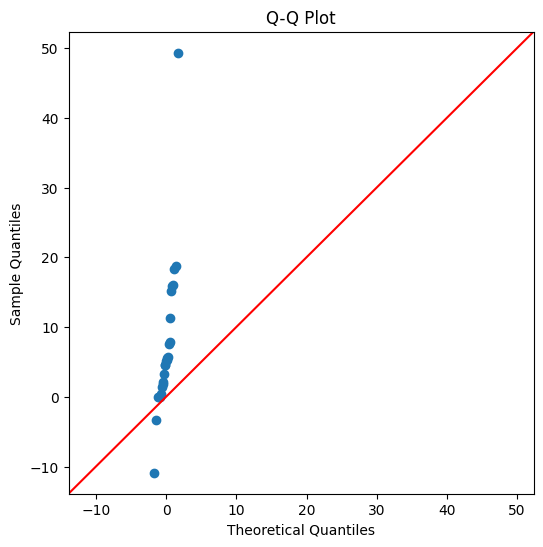

In [36]:
#Another test for normality


fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(gp_first_period_total, line ='45', ax=ax)
plt.title('Q-Q Plot')
plt.show()


In [61]:
#For peak movement 9/9-9/20
gp_peak = gp_comp_df.loc[0, '9/9-9/20_peak']
population_peaks = gp_comp_df['9/9-9/20_peak'][1:]

u_stat_peak, p_val_peak = stats.mannwhitneyu(gp_peak, population_peaks, alternative='two-sided')

print(f'Mann Whitney U Statistics: {u_stat_peak}')
print(f'p value: {p_val_peak:.4f}')

Mann Whitney U Statistics: 24.0
p value: 0.1106


In [52]:
#For total movement 9/9-9/20

gp_total = gp_comp_df.loc[0,'9/9-9/20_total']
population_total = gp_comp_df['9/9-9/20_total'][1:]

u_stat_total, p_val_total = stats.mannwhitneyu(gp_total, population_total, alternative = 'two-sided')

print(f'Mann Whitney U Statistics: {u_stat_total}')
print(f'p value: {p_val_total:.4f}')

Mann Whitney U Statistics: 23.0
p value: 0.1451


In [65]:
  #For peak movement 10/23-10/30

gp_peak = gp_comp_df.loc[0, '10/23-10/30_peak']
total_peak = gp_comp_df['10/23-10/30_peak'][1:]

u_stat_total, p_val_total = stats.mannwhitneyu(gp_peak, total_peak, alternative = 'two-sided')
print(f'Mann Whitney U Statistics: {u_stat_total}')
print(f'p value: {p_val_total:.4f}')

Mann Whitney U Statistics: 24.0
p value: 0.0800


In [66]:
#For peak movement 11/26-12/3

gp_peak = gp_comp_df.loc[0, '11/26-12/3_peak']
total_peak = gp_comp_df['11/26-12/3_peak'][1:]

u_stat_total, p_val_total = stats.mannwhitneyu(gp_peak, total_peak, alternative = 'two-sided')
print(f'Mann Whitney U Statistics: {u_stat_total}')
print(f'p value: {p_val_total:.4f}')

Mann Whitney U Statistics: 21.0
p value: 0.3200
